In [53]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.metrics import mean_squared_error

In [56]:
df = pdr.get_data_tiingo('AAPL', api_key='d063a3df5daa60efa50c72ddaa5697a10171648d')
df.to_csv('AAPL.csv')
data=pd.read_csv('AAPL.csv')

c:\New folder\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [57]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-08-21 00:00:00+00:00,157.21,157.89,155.1101,157.50,26145653,37.298598,37.459930,36.800390,37.367402,104582612,0.0,1.0
1,AAPL,2017-08-22 00:00:00+00:00,159.78,160.00,158.0200,158.23,21297812,37.908339,37.960535,37.490773,37.540596,85191248,0.0,1.0
2,AAPL,2017-08-23 00:00:00+00:00,159.98,160.47,158.8800,159.07,19198189,37.955790,38.072044,37.694811,37.739889,76792756,0.0,1.0
3,AAPL,2017-08-24 00:00:00+00:00,159.27,160.74,158.5500,160.43,19029621,37.787340,38.136102,37.616518,38.062554,76118484,0.0,1.0
4,AAPL,2017-08-25 00:00:00+00:00,159.86,160.56,159.2700,159.65,25015218,37.927319,38.093397,37.787340,37.877496,100060872,0.0,1.0


In [58]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-08-12 00:00:00+00:00,172.10,172.17,169.4000,169.82,68039382,172.10,172.17,169.4000,169.82,68039382,0.0,1.0
1254,AAPL,2022-08-15 00:00:00+00:00,173.19,173.39,171.3450,171.52,54091694,173.19,173.39,171.3450,171.52,54091694,0.0,1.0
1255,AAPL,2022-08-16 00:00:00+00:00,173.03,173.71,171.6618,172.78,56377050,173.03,173.71,171.6618,172.78,56377050,0.0,1.0
1256,AAPL,2022-08-17 00:00:00+00:00,174.55,176.15,172.5700,172.77,79542037,174.55,176.15,172.5700,172.77,79542037,0.0,1.0
1257,AAPL,2022-08-18 00:00:00+00:00,174.15,174.90,173.1200,173.75,62290075,174.15,174.90,173.1200,173.75,62290075,0.0,1.0


In [59]:
data_close=data.reset_index()['close']

In [60]:
data_close

0       157.21
1       159.78
2       159.98
3       159.27
4       159.86
         ...  
1253    172.10
1254    173.19
1255    173.03
1256    174.55
1257    174.15
Name: close, Length: 1258, dtype: float64

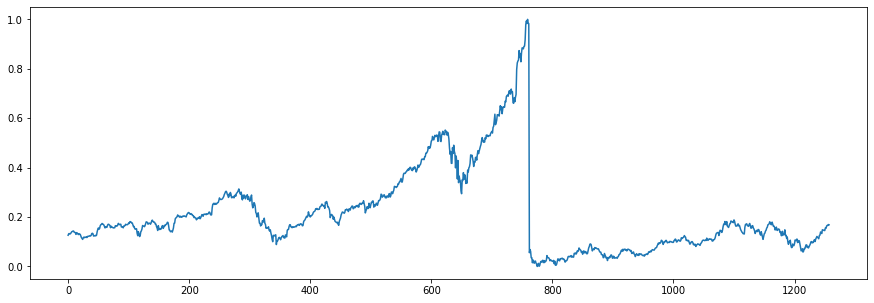

In [76]:
plt.figure(figsize=(15,5))
plt.plot(data_close)

In [62]:
scaler=MinMaxScaler(feature_range=(0,1))
data_close=scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [63]:
print(data_close)

[[0.12616155]
 [0.13259862]
 [0.13309956]
 ...
 [0.16578585]
 [0.16959299]
 [0.16859111]]


In [64]:
training_size=int(len(data_close)*0.65)
train_data,test_data=data_close[0:training_size,:],data_close[training_size:len(data_close),:1]

In [90]:
int(len(data_close)*0.65)

817

In [65]:
train_data

array([[1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],
       [1.18697558e-01],
       [1.16318096e-01],
       [1.18422041e-01],
       [1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],
       [1.21377583e-01],
       [1.22730119e-01],
       [1.22880401e-01],
       [1.24508453e-01],
       [1.23130870e-01],
       [1.25610520e-01],
       [1.32849092e-01],


In [66]:
def create_dataset(dataset, time_step):
	X_data, y_data = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		X_data.append(a)
		y_data.append(dataset[i + time_step, 0])
	return np.array(X_data), np.array(y_data)

In [67]:
X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [68]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train.shape

(716, 100, 1)

In [69]:
model=keras.Sequential()

model.add(keras.layers.LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(keras.layers.LSTM(50,return_sequences=True))
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 492ms/step - loss: 0.0641 - val_loss: 0.0085
Epoch 2/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0157 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0124 - val_loss: 0.0012
Epoch 4/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0099 - val_loss: 0.0013
Epoch 5/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0089 - val_loss: 3.2596e-04
Epoch 6/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0081 - val_loss: 0.0013
Epoch 7/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0074 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0064 - val_loss: 2.7666e-04
Epoch 9/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0065 - val_loss: 3.4429e-04
Epoch 10/100
12/12 [==============================] - 3s 227ms/step - loss: 0.

In [72]:
predicted_train_scaled=model.predict(X_train)
predicted_test_scaled=model.predict(X_test)
predicted_train=scaler.inverse_transform(predicted_train_scaled)
predicted_test=scaler.inverse_transform(predicted_test_scaled)
print("RMSE for train data = {}".format(math.sqrt(mean_squared_error(predicted_train,y_train))))
print("RMSE for test data = {}".format(math.sqrt(mean_squared_error(predicted_test,y_test))))

11/11 [==============================] - 1s 55ms/step
RMSE for train data = 227.5040484820099
RMSE for test data = 152.77291929060473


In [88]:
print(predicted_train.shape)
print(predicted_test.shape)
print(scaler.inverse_transform(data_close).shape)

(716, 1)
(340, 1)
(1258, 1)


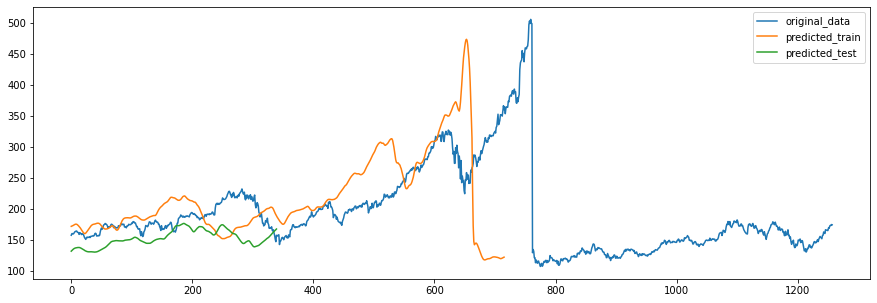

In [87]:
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(data_close),label='original_data')
plt.plot(predicted_train,label='predicted_train')
plt.plot( predicted_test,label='predicted_test')
plt.legend()

In [94]:
x_input=test_data[341:].reshape(1,-1)
print(x_input.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

(1, 100)
[0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 0.14639949906073885, 0.1458484658735128, 0.15168440826549778, 0.15125860989355033, 0.14922980588603624, 0.13763306199123349, 0.140363180964308, 0.1251346274264245, 0.12455854727614268, 0.14226675015654344, 0.12726361928616153, 0.12804007514088916, 0.13184721352536, 0.14822792736380713, 0.12505948653725735, 0.12633688165309953, 0.11326236693800873, 0.11939887288666245, 0.09933625547902314, 0.08946775203506574, 0.10086412022542268, 0.09693174702567309, 0.10619912335629306, 0.08510958046336875, 0.0764182842830306, 0.07701941139636814, 0.09084533500313086, 0.08395742016280527, 0.0843581715716969, 0.09252348152786471, 0.10720100187852216, 0.10519724483406384, 0.10487163431433938, 0.11113337507827176, 0.0965309956167814

In [95]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15670967]
101
1 day input [0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.